# Loading in the Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48], # 14 known Madision papers
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24, # 51 known Hamilton papers
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5], # 4 of the 5 known Jay papers; 64 is the other known Jay paper
    'Shared': [18, 19, 20], # 3 co-written Madison/Hamilton papers claimed by Madison
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63], # 12 disputed papers
    'TestCase': [64] # Jay's 5th paper, held as a test case
}

# A function that compiles all of the text files associated with a single author into a single string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'/content/drive/My Drive/Google CREWE/data/federalist_{filename}.txt') as f:
            strings.append(f.read())
    return '\n'.join(strings)

# Make a dictionary out of the authors' corpora
federalist_by_author = {}  
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)
 
# check that the files loaded properly
for author in papers:
    print(federalist_by_author[author][:100])

 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)
 1

General Introduction

For the Independent Journal. Saturday, October 27, 1787


HAMILTON

To the
 2

Concerning Dangers from Foreign Force and Influence

For the Independent Journal. Wednesday, Oct
 18

The Same Subject Continued (The Insufficiency of the Present
Confederation to Preserve the Unio
 49

Method of Guarding Against the Encroachments of Any One Department of
Government by Appealing t
 64

The Powers of the Senate

From The Independent Journal. Wednesday, March 5, 1788.

JAY

To the 


# First Stylometric Test: Mendenhall's Characteristic Curves of Composition

In [17]:
# Load nltk 
import nltk
# install nltk 'punkt'
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

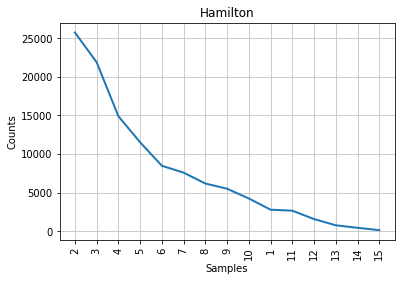

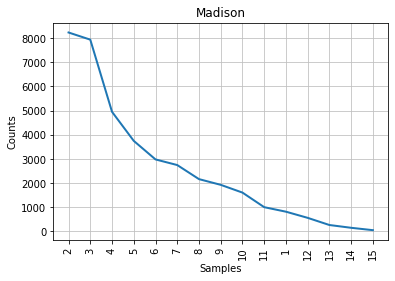

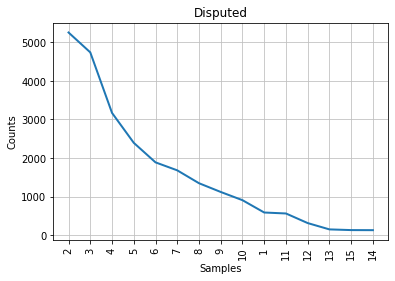

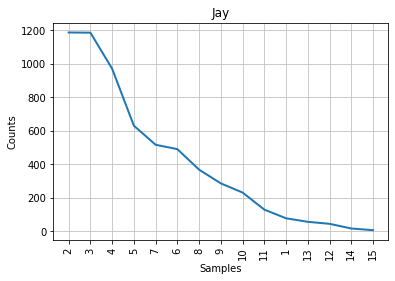

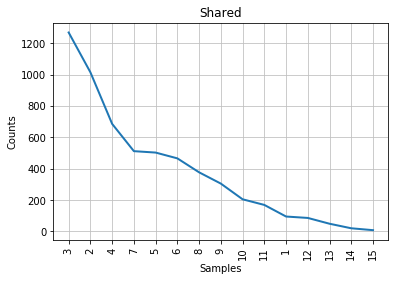

In [18]:
%matplotlib inline

# Compare the disputed papers to those written by everyone, 
# including the shared ones. 
authors = ("Hamilton", "Madison", "Disputed", "Jay", "Shared")

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])
    
    # Filter out punctuation
    federalist_by_author_tokens[author] = ([token for token in tokens 
                                            if any(c.isalpha() for c in token)])
   
    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)     

# Second Stylometric Test: John Burrows' Delta Method 

In [20]:
# Feature Selection

# Who are we dealing with this time?
authors = ("Hamilton", "Madison", "Jay", "Disputed", "Shared")

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += federalist_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30)) # use the top 30 most frequent words as features
# Most of these 30 will be funtion words and common verbs. Remember that function words are a useful tool for stylometry. Their
# usage is not something that is consciously monitored by an individual and they are topic-independent
print(whole_corpus_freq_dist[ :10 ]) # Print a sample of the most frequent words

# Put the features in a list
features = []
for item in whole_corpus_freq_dist:
    features.append(item[0])
print(features)

[('the', 16433), ('of', 11713), ('to', 6787), ('and', 4834), ('in', 4088), ('a', 3799), ('be', 3761), ('that', 2707), ('is', 2116), ('which', 2048)]
['the', 'of', 'to', 'and', 'in', 'a', 'be', 'that', 'is', 'which', 'it', 'by', 'as', 'not', 'The', 'would', 'have', 'will', 'or', 'for', 'this', 'their', 'with', 'from', 'are', 'on', 'an', 'States', 'government', 'been']


In [22]:
import pprint
#Calculating features for each subcorpus

# The main data structure
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {} 
    
    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(federalist_by_author_tokens[author])
    
    # Calculate each feature's presence in the subcorpus
    for feature in features:
        # Count the number of times each feature appears
        presence = federalist_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall
        print(author, ",",feature, ":", presence, "/", overall, "=", feature_freqs[author][feature])
pprint.pprint(feature_freqs)

Hamilton , the : 9786 / 114208 = 0.08568576632109835
Hamilton , of : 7324 / 114208 = 0.06412860745306809
Hamilton , to : 4465 / 114208 = 0.03909533482768283
Hamilton , and : 2603 / 114208 = 0.022791748388904454
Hamilton , in : 2672 / 114208 = 0.023395909218268424
Hamilton , a : 2416 / 114208 = 0.021154384981787615
Hamilton , be : 2293 / 114208 = 0.02007740263379098
Hamilton , that : 1697 / 114208 = 0.0148588540207341
Hamilton , is : 1298 / 114208 = 0.011365228355281592
Hamilton , which : 1241 / 114208 = 0.010866138974502662
Hamilton , it : 1228 / 114208 = 0.01075231157186887
Hamilton , by : 841 / 114208 = 0.007363757355001401
Hamilton , as : 908 / 114208 = 0.007950406276267863
Hamilton , not : 775 / 114208 = 0.006785864387783693
Hamilton , The : 738 / 114208 = 0.006461894087979827
Hamilton , would : 907 / 114208 = 0.007941650322219109
Hamilton , have : 777 / 114208 = 0.0068033762958812
Hamilton , will : 686 / 114208 = 0.0060065844774446625
Hamilton , or : 741 / 114208 = 0.0064881619501

In [23]:
#Calculating feature averages and standard deviations

import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean 
    # and standard deviation
    corpus_features[feature] = {}
    
    # Calculate the mean of the relative frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature] #adding together the relative frequency from all authors
    feature_average = feature_average/len(authors) # dividing the sum by the number of authors
    corpus_features[feature]["Mean"] = feature_average # entering the value in the dictionary
    
    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"] # subtract the standard deviation from the rel freq
        feature_stdev += diff*diff # square the difference
    feature_stdev = feature_stdev / (len(authors) - 1) # divide by the number of authors - 1
    feature_stdev = math.sqrt(feature_stdev) # take the square root
    corpus_features[feature]["StdDev"] = feature_stdev # add the value to the dictionary

pprint.pprint(corpus_features)

{'States': {'Mean': 0.0033285591379520045, 'StdDev': 0.0022723585262329265},
 'The': {'Mean': 0.007370385223012579, 'StdDev': 0.0036256848282677644},
 'a': {'Mean': 0.01716815889666657, 'StdDev': 0.004563730805244978},
 'an': {'Mean': 0.0035189395458588507, 'StdDev': 0.0014048065426734153},
 'and': {'Mean': 0.03240637673226743, 'StdDev': 0.011178221885528779},
 'are': {'Mean': 0.0053214782477446505, 'StdDev': 0.0006376862350766565},
 'as': {'Mean': 0.008279752725260856, 'StdDev': 0.0016364335439215333},
 'be': {'Mean': 0.01692472284505925, 'StdDev': 0.007321027190261761},
 'been': {'Mean': 0.0032796498612564394, 'StdDev': 0.0014746586145133554},
 'by': {'Mean': 0.010154365112840633, 'StdDev': 0.0021464569232205284},
 'for': {'Mean': 0.00637112707668073, 'StdDev': 0.0005453325452922957},
 'from': {'Mean': 0.005701723119456467, 'StdDev': 0.0010148378715777436},
 'government': {'Mean': 0.004635981369681661, 'StdDev': 0.0018636759929199027},
 'have': {'Mean': 0.005794686397521165, 'StdDev'

In [24]:
# Calculating z-scores
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:
        
        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) / 
                                            feature_stdev)

pprint.pprint(feature_zscores)

{'Disputed': {'States': 0.5383919497471958,
              'The': -0.2005019521422165,
              'a': 0.8298794776959609,
              'an': -0.05281789653720673,
              'and': -0.789598480658642,
              'are': 1.4299539024578187,
              'as': 0.6289584528933906,
              'be': 0.9594864271688365,
              'been': 0.2509969689337251,
              'by': 0.4850047948342163,
              'for': 0.9505285651119626,
              'from': -0.40556797439967857,
              'government': 0.19697323621707888,
              'have': -0.39275880766098614,
              'in': -0.0031115868232810834,
              'is': 0.6576569211698898,
              'it': -0.390081619738978,
              'not': 0.7227443467667027,
              'of': 0.29554693921347824,
              'on': 0.8925004702045772,
              'or': -0.35100849200702694,
              'that': 0.2515300649124605,
              'the': 0.3960341234296179,
              'their': -0.54426237836192

In [25]:
# Calculating features and z-scores for our test case
# Tokenize the test case
testcase_tokens = nltk.word_tokenize(federalist_by_author["TestCase"])

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token for token in testcase_tokens 
                   if any(c.isalpha() for c in token)]
 
# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall # relative frequency in the testcase
    print(feature, ":", presence, "/", overall, "=", testcase_freqs[feature])
    
# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", "'", feature,"'", "is", testcase_zscores[feature])


the : 162 / 2327 = 0.06961753330468415
of : 98 / 2327 = 0.04211431027073485
to : 85 / 2327 = 0.0365277180919639
and : 101 / 2327 = 0.04340352385045122
in : 51 / 2327 = 0.02191663085517834
a : 32 / 2327 = 0.013751611516974646
be : 57 / 2327 = 0.024495058014611087
that : 46 / 2327 = 0.019767941555651054
is : 16 / 2327 = 0.006875805758487323
which : 14 / 2327 = 0.006016330038676407
it : 24 / 2327 = 0.010313708637730984
by : 28 / 2327 = 0.012032660077352814
as : 35 / 2327 = 0.015040825096691019
not : 20 / 2327 = 0.008594757198109154
The : 12 / 2327 = 0.005156854318865492
would : 7 / 2327 = 0.0030081650193382035
have : 19 / 2327 = 0.008165019338203695
will : 25 / 2327 = 0.010743446497636441
or : 14 / 2327 = 0.006016330038676407
for : 13 / 2327 = 0.00558659217877095
this : 9 / 2327 = 0.003867640739149119
their : 21 / 2327 = 0.009024495058014611
with : 11 / 2327 = 0.004727116458960034
from : 11 / 2327 = 0.004727116458960034
are : 25 / 2327 = 0.010743446497636441
on : 14 / 2327 = 0.00601633003

In [26]:
# Calculating Delta

for author in authors:
    delta = 0
    for feature in features:
         # take the absolute value of the difference between the z-scores of the feature in the test case and the feature in the 
         # author's subcorpus
        delta += math.fabs((testcase_zscores[feature] - 
                            feature_zscores[author][feature]))
    delta /= len(features) # divide the sum by the number of features to find the delta for that author
    print( "Delta score for candidate", author, "is", delta )
    
# Remember the smallest Delta is the predicted author

Delta score for candidate Hamilton is 1.6723564264254962
Delta score for candidate Madison is 1.5301754383633985
Delta score for candidate Jay is 1.477207466374191
Delta score for candidate Disputed is 1.4644928109781494
Delta score for candidate Shared is 1.7611735204019376


Activities adapted from: Laramée, François Dominic. (2018) "Introduction to stylometry with Python," The Programming Historian. Use under CC BY 4.0.
Access at: https://programminghistorian.org/en/lessons/introduction-to-stylometry-with-python
